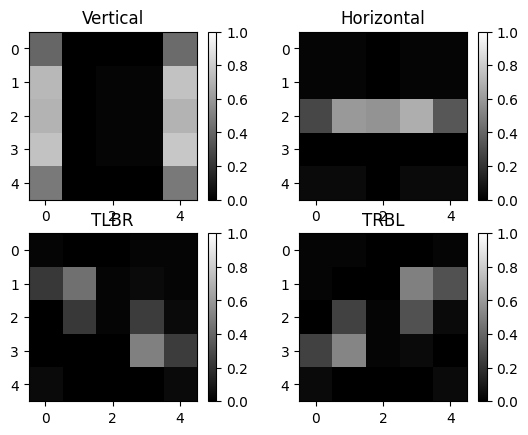

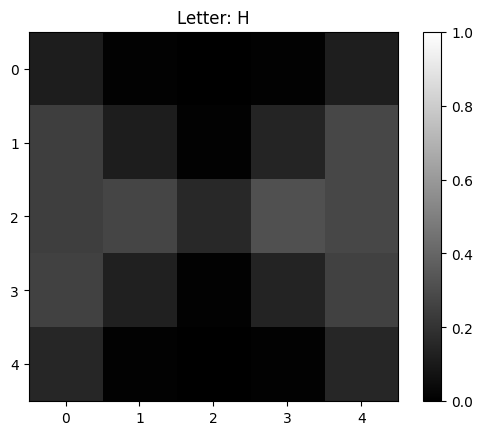

In [2]:
from brian2 import *
from matrices import import_light, import_dog_inh, import_v1
%matplotlib inline
import numpy as np
import pytime

def visualize_Hypercolumn(mfr_list,let):

    titles = ['Vertical', 'Horizontal', 'TLBR', 'TRBL']
    a = np.zeros((5,5))
    
    for i in range(4):
        tmp = mfr[25*i:25*(i+1)]/100
        tmp = tmp.reshape(5,5)
        tmp = asarray(tmp)
        a += tmp/4
        plt.subplot(2,2,i+1)
        plt.imshow(tmp,cmap='gray',vmin=0,vmax=1)
        plt.colorbar()
        plt.title(titles[i])
    
    
    plt.figure()
    plt.imshow(a,cmap='gray',vmin=0,vmax=1)
    plt.colorbar()
    plt.title('Letter: '+let)
    
    return a

nL1 = nL2 = 5**2
nL3 = nL2*4
nL4 = 10

taum = 10*ms
taue = taui = 5*ms

duration = 500*ms

eqsCUBALIF ='''
dv/dt  = (ge+gi-v)/taum : volt (unless refractory)
dge/dt = -ge/taue : volt
dgi/dt = -gi/taui : volt
'''

letters = ['C','D','H','K','N','O','R','S','V','Z']
ind = 2
real_letter = letters[ind]

pat = import_light()
light = TimedArray(pat[ind].reshape(1,25)*100*Hz, dt=duration)

L1 = PoissonGroup(nL1, rates='light(t,i)')
L2 = NeuronGroup(nL2, eqsCUBALIF, threshold='v>0.3*volt', reset='v = 0*volt', refractory=5*ms, method='euler')
L3 = NeuronGroup(nL3, eqsCUBALIF, threshold='v>0.3*volt', reset='v = 0*volt', refractory=5*ms, method='euler')
L4 = NeuronGroup(nL4, eqsCUBALIF, threshold='v>0.3*volt', reset='v = 0*volt', refractory=5*ms, method='euler')

sp1 = SpikeMonitor(L1)
sp2 = SpikeMonitor(L2)
sp3 = SpikeMonitor(L3)
sp4 = SpikeMonitor(L4)

gain = 1*volt

# From photoreceptors to ganglion cells

e1 = Synapses(L1, L2, 'w : volt', on_pre='ge += w')
e1.connect()
exc1 = np.eye(nL2)
e1.w = exc1.flatten()*8*gain

i1 = Synapses(L1, L2, 'w : volt', on_pre='gi -= w')
i1.connect()
inh1 = import_dog_inh()
i1.w = inh1.flatten()*gain

# From ganglion cells to simple cells

e2 = Synapses(L2, L3, 'w : volt', on_pre='ge += w')
e2.connect()
exc2 = import_v1()
e2.w = exc2.flatten()*gain/3

run(duration)
mfr = sp3.count/duration
a = visualize_Hypercolumn(mfr,letters[ind])